# Sentiment Analysis using Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('tweets-data.csv', encoding='latin-1', header=None)

df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user', 'tweet']

df.head()

,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df = df.drop(['id', 'date', 'query', 'user'], axis=1)

df.head()

,sentiment,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
label_mapping = {0 : 'negative', 4 : 'positive'}

def label_encoder(label):
    return label_mapping[label]

In [6]:
df['sentiment'] = df['sentiment'].map(label_encoder)

df.head(10)

,sentiment,tweet
0,negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,negative,is upset that he can't update his Facebook by ...
2,negative,@Kenichan I dived many times for the ball. Man...
3,negative,my whole body feels itchy and like its on fire
4,negative,"@nationwideclass no, it's not behaving at all...."
5,negative,@Kwesidei not the whole crew
6,negative,Need a hug
7,negative,@LOLTrish hey long time no see! Yes.. Rains a...
8,negative,@Tatiana_K nope they didn't have it
9,negative,@twittera que me muera ?


In [7]:
positive_tweets = df[df['sentiment'] == 'positive']

positive_tweets.head(10)

,sentiment,tweet
800000,positive,I LOVE @Health4UandPets u guys r the best!!
800001,positive,im meeting up with one of my besties tonight! ...
800002,positive,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,positive,Being sick can be really cheap when it hurts t...
800004,positive,@LovesBrooklyn2 he has that effect on everyone
800005,positive,@ProductOfFear You can tell him that I just bu...
800006,positive,@r_keith_hill Thans for your response. Ihad al...
800007,positive,"@KeepinUpWKris I am so jealous, hope you had a..."
800008,positive,"@tommcfly ah, congrats mr fletcher for finally..."
800009,positive,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [8]:
len(positive_tweets)

800000

In [9]:
negative_tweets = df[df['sentiment'] == 'negative']

len(negative_tweets)

800000

([<matplotlib.patches.Wedge at 0x1e9dd3e2010>,
 [Text(-1.1, 1.3471114790620887e-16, 'positive'),
  Text(1.1, -2.6942229581241775e-16, 'negative')])

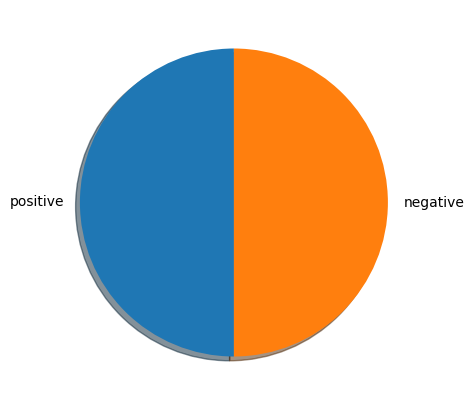

In [10]:
# Vizualizing the data with figure
fig = plt.figure(figsize=(5, 5))

# Assigning labels for both the sentiments
labels = 'positive', 'negative'

# sizes for the data belonging to two classes
sizes = [len(positive_tweets), len(negative_tweets)]

# Creating a pie chart to vizualize the data
plt.pie(sizes, labels=labels, shadow=True, startangle=90)

In [11]:
df.isnull().sum()

sentiment    0
tweet        0
dtype: int64

In [12]:
# print a random positive tweet in green
print('\033[92m' + positive_tweets['tweet'].iloc[random.randint(0, 800000)])

# print a random negative tweet in red
print('\033[91m' + negative_tweets['tweet'].iloc[random.randint(0, 800000)])

Is baby sitting now  Zach's asleep at the moment... good times! Lets hope he stays that way for a while!
@macbella2  tis so sad! it's my exam week and I feel like crap-ola!


In [13]:
# Downloading the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
pos_tweets = df[df['sentiment'] == 'positive']['tweet']
neg_tweets = df[df['sentiment'] == 'negative']['tweet']

print('Total positive tweets : ', len(pos_tweets))
print('Total negative tweets : ', len(neg_tweets))

Total positive tweets :  800000
Total negative tweets :  800000


In [15]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [16]:
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [17]:
def process_tweet(tweet):
    
    # removing old style tweets
    tweet_new = re.sub(r'RT[\s]+', '', tweet)
    
    # removing hyperlinks
    tweet_new = re.sub(r'https?://[^\s\n\r]+', '', tweet_new)
    
    #removing hash tags
    tweet_new = re.sub(r'#', '', tweet_new)
    
    # instanciate a tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    
    # tokenize tweets
    tweet_tokens = tokenizer.tokenize(tweet_new)
    
    tweets_clean = []
    
    for word in tweet_tokens:
        if (word not in stopwords_english and word not in string.punctuation):
            tweets_clean.append(word)
            
    stemmer = PorterStemmer()
    
    tweets_stem = []
    
    for word in tweets_clean:
        stem_word = stemmer.stem(word)
        tweets_stem.append(stem_word)
        
    return tweets_stem

In [18]:
test_tweet = df['tweet'][5000]
test_tweet

'@LouLouK Gisburn is great, there are some nice little single track. Did you try some of the new bits? I havent been in a while '

In [19]:
process_tweet(test_tweet)

['gisburn',
 'great',
 'nice',
 'littl',
 'singl',
 'track',
 'tri',
 'new',
 'bit',
 'havent']

In [20]:
# Converting the data into lists of positive and negative tweets
all_positive_tweets = pos_tweets.to_list()
all_negative_tweets = neg_tweets.to_list()

print('Length of all positive tweets : ', len(all_positive_tweets))
print('Length of all negative tweets : ', len(all_negative_tweets))

Length of all positive tweets :  800000
Length of all negative tweets :  800000


In [21]:
# Spliting the data into training and testing sets
train_positive = all_positive_tweets[:640000]
test_positive = all_positive_tweets[640000:]
train_negative = all_negative_tweets[:640000]
test_negative = all_negative_tweets[640000:]

train_x = train_positive + train_negative
test_x = test_positive + test_negative

print('Train data :-\n')
print(train_x[:5])

print('Test data :-\n')
print(test_x[:5])

print('Length of train_x : ', len(train_x))
print('Length of test_x : ', len(test_x))

Train data :-

['I LOVE @Health4UandPets u guys r the best!! ', 'im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!', '@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. ', 'Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup', '@LovesBrooklyn2 he has that effect on everyone ']
Test data :-

['@Regencyg I, the lowly Freshman, will take heed of this. ', '@Jonasbrothers i love u to!!!  Nick J is a Sudmuffin ', '@TiffanySchmidt hehe Blame away  New WIP ftw!', 'will be going out soon! ', '@societyreject Yay       ']
Length of train_x :  1280000
Length of test_x :  320000


In [22]:
y_train = np.append(np.ones(len(train_positive)), np.zeros(len(train_negative)))
y_test = np.append(np.ones(len(test_positive)), np.zeros(len(test_negative)))

print('Length of y_train : ', len(y_train))
print('Length of y_test : ', len(y_test))

Length of y_train :  1280000
Length of y_test :  320000


In [23]:
def count_tweets(result, tweets, ys):
    
    for y, tweet in zip(ys, tweets):
        # the key in the dictionary is the word and label tuple
        for word in process_tweet(tweet):
            pair = (word, y)
            
            # if the key exists, incrementing the count by 1
            if pair in result:
                result[pair] += 1
                
            # else assigining it the count of 1
            else:
                result[pair] = 1
                
    return result

In [24]:
result = {}
sample = ['i am happy', 'i am tricked', 'he is smiling', 'the are nice', 'i am strong']
ys = [1, 0, 1, 1, 1]

count_tweets(result, sample, ys)

{('happi', 1): 1,
 ('trick', 0): 1,
 ('smile', 1): 1,
 ('nice', 1): 1,
 ('strong', 1): 1}

In [32]:
# freqs_dict = count_tweets({}, train_x, y_train)

In [26]:
import pickle

# file_path = 'freqs_count_dict.json'

# with open(file_path, 'wb') as pickle_file:
#     pickle.dump(freqs_dict, pickle_file)

In [27]:
# loading the frequency count dictionary
file_path = 'freqs_count_dict.json'

with open(file_path, 'rb') as pickle_file:
    freqs_dict = pickle.load(pickle_file)

In [44]:
# just a simple fuction to get the values of certain classes
def lookup(freqs_dict, word, label):
    
    n = 0
    
    pair = (word, label)
    if (pair in freqs_dict):
        n = freqs_dict[pair]
        
    return n

In [43]:
# training Naive Bayes classifier
def train_naive_bayes(freqs_dict, train_x, train_y):
    
    log_likelihood = {}
    logprior = 0
    
    # calculating the total number of unique words in the dictionary
    vocab = set([pair[0] for pair in freqs_dict.keys()])
    V = len(vocab)
    
    # calculating the total number of words in each classes
    N_pos = N_neg = V_pos = V_neg = 0
    for pair in freqs_dict.keys():
        if pair[1] > 0:
            # incrementing the positive word count by the value of the pair 
            N_pos += freqs_dict[pair]
            V_pos += 1
            
        else:
            # incrementing the positive word count by the value of the pair
            N_neg += freqs_dict[pair]
            V_neg += 1
        
    # the total number of documents
    D = len(train_y)
    # the number of positive documents
    D_pos = len(list(filter(lambda x : x > 0, train_y)))
    # the number of negative documents
    D_neg = len(list(filter(lambda x : x <= 0, train_y)))
    
    # calculating the logprior
    logprior = np.log(D_pos) - np.log(D_neg)
    
    for word in vocab:
        # getting the number of positive and negative words
        freq_pos = lookup(freqs_dict, word, 1)
        freq_neg = lookup(freqs_dict, word, 0)
        
        # calculating the probability of each positive and negative word
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)
        
        # loglikelihood of the word i.e a dictionary
        log_likelihood[word] = np.log(p_w_pos / p_w_neg)
        
    return logprior, log_likelihood

In [30]:
logprior, loglikelihood = train_naive_bayes(freqs_dict, train_x, y_train)

print(logprior)
print(len(loglikelihood))

0.0
236913


In [45]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
    
    # processing the tweet to get list of words
    word_1 = process_tweet(tweet)
    
    # initializing probability to zero
    p = 0
    # adding the logprior(zero for balanced dataset)
    p += logprior
    
    for word in word_1:
        if word in loglikelihood:
            # adding the loglikelihood of that word to the probability
            p += loglikelihood[word]
            
    return p

In [46]:
my_tweet = 'He was extremely delighted!!'
p = naive_bayes_predict(my_tweet, logprior, loglikelihood)

print('The output is : ', p)

The output is :  1.0986955909322416


In [39]:
# testing the naive Bayes predict
def test_naive_bayes(test_x, test_y, logprior, loglikelihood, naive_bayes_predict=naive_bayes_predict):
    
    # this is to be returned
    accuracy = 0
    # creating an empty list to store predictions
    y_hats = []
    
    for tweet in test_x:
        if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
            y_hat_i = 1
        else:
            y_hat_i = 0
            
        # append the predictions to the list
        y_hats.append(y_hat_i)
    
    # the average of absolute values of the differences of y and y_hat
    error = np.mean(np.absolute(y_hats - test_y))
    # accuracy is 1 minus the error
    accuracy = 1 - error
    
    return accuracy

In [40]:
print('Accuracy : ', test_naive_bayes(test_x, y_test, logprior, loglikelihood))

Accuracy :  0.7569625


In [42]:
# testing a set of tweets
tweets_list = ['I am happy', 'He is bad', 'this movie should have been great', 'great', 'awesome!', 'He is aweful!', 'The movie Oppenheimer by @Nolan is a masterpiece!', 'Everyone should watch the movie Tenet']

for tweet in tweets_list:
    p = naive_bayes_predict(tweet, logprior, loglikelihood)
    print(f'{tweet} -> {p:.2f}')

I am happy -> 1.31
He is bad -> -1.31
this movie should have been great -> 1.85
great -> 1.19
awesome! -> 1.39
He is aweful! -> -0.32
The movie Oppenheimer by @Nolan is a masterpiece! -> 0.83
Everyone should watch the movie Tenet -> 1.56
